# Storytelling: House Prices

##### Problem Identification: 
Given a csv dataset containing 80 different features, predictors, and variables, provide a machine learning model that can predict sale price:


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Load the Data

Data obtained from Kaggle. The dataset being loaded has been cleaned, wrangled, and explored. Those steps can be seen here https://github.com/dennis-francis/Springboard/blob/main/house_prices.ipynb. 

In [84]:
df = pd.read_csv('/Users/dennisfrancis/Desktop/Data/house_prices_preprocessed.csv')

## Analyzing Housing Data by Neighborhood

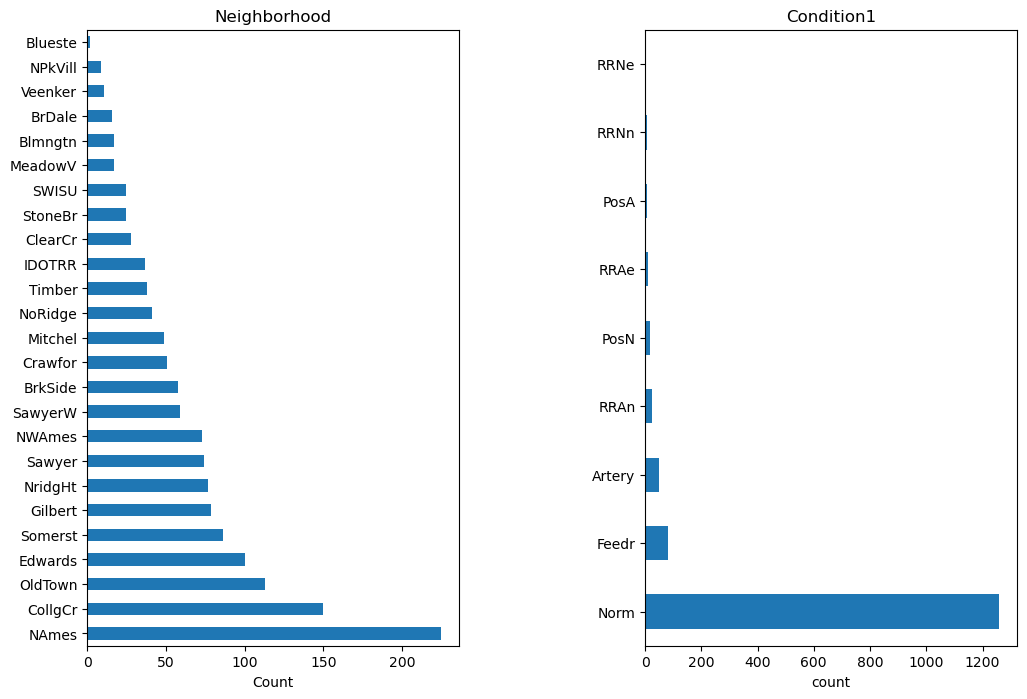

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
df.Neighborhood.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title("Neighborhood")

ax[0].set_xlabel("Count")

df.Condition1.value_counts().plot(kind='barh', ax=ax[1])

ax[1].set_title("Condition1")

ax[1].set_xlabel("count")

plt.subplots_adjust(wspace=0.5);



mean sale price: 180921.19589041095
min sale price: 34900
max sale price: 755000


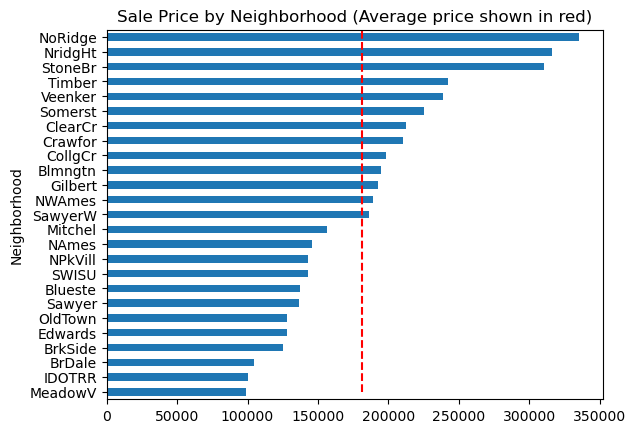

In [77]:
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="barh");
plt.title("Sale Price by Neighborhood (Average price shown in red)");
avg_price = df.SalePrice.mean()
plt.plot([avg_price,avg_price],[0,101],  color='r', linestyle='--');
print(f"mean sale price: {df.SalePrice.mean()}")
print(f"min sale price: {df.SalePrice.min()}")
print(f"max sale price: {df.SalePrice.max()}")

### NAmes 
is the neighborhood with the most transactions deals occurring. Blueste is the neighborhood that had the fewest homes sold. The average house price was 180,000 USD 


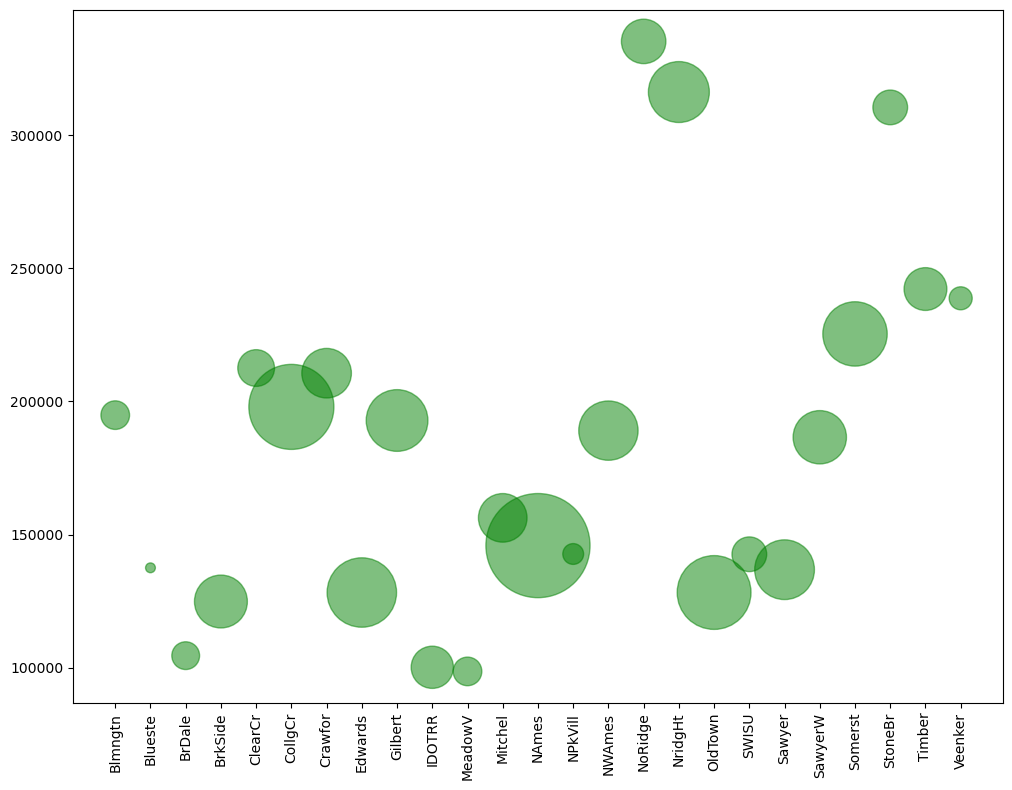

In [82]:
df2 = df.groupby("Neighborhood")["SalePrice"].agg(['mean', 'count'])
df2.columns = ['avg', 'number']
df2 = pd.DataFrame({'Neighborhood': df2.index, 'SalePrice':df2.avg, 'HomesSold': df2.number}).reset_index(drop=True)
_ = plt.figure(figsize=(12, 9))
_ = plt.scatter(x=df2.Neighborhood, y=df2.SalePrice ,alpha=.5, c='green',  s=df2.HomesSold*25)
_ = plt.xticks(rotation='vertical')
# want to add labels to top 5 sites

Small bubbles indicate that few homes were sold in that neighborhood. It appears that for neighborhoods where there were more sales that occurred, the prices are lower than 200k on average. All homes in neighborhoods with not that much movement have higher sales prices.

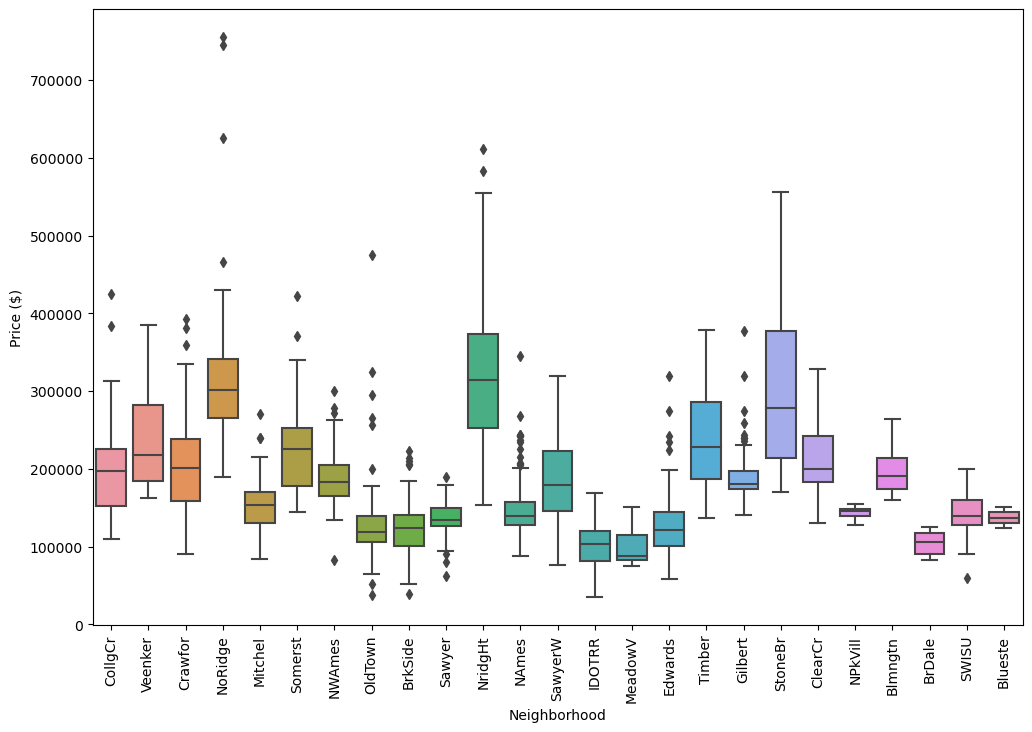

In [83]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('Neighborhood');

NridgHt and StoneBr have the highest variation in housing prices, and they also tend to have homes with higher selling prices.


## Modeling

##### Random Forest Regression

In [87]:
X = df.drop(['Unnamed: 0', 'SalePrice'], axis=1).values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {rf_model.score(X_test, y_test)}")

Root Mean Squared Error: 25836.927783181756
R-squared: 0.9043367916593468


In [88]:
kf = KFold(n_splits=10, shuffle=True)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_results = cross_val_score(rf_model, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, .975]))

[0.88742989 0.90617377 0.90834025 0.76600889 0.86406095 0.91628149
 0.91180343 0.78067723 0.84926709 0.83410337]
0.8624146362317384 0.051906499114613584
[0.76930927 0.91527393]
